**50_Startups dataset**

Prepare a prediction model for profit of 50_startups data.


Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

* R&D Spend -- Research and devolop spend in the past few years
* Administration -- spend on administration in the past few years
* Marketing Spend -- spend on Marketing in the past few years
* State -- states from which data is collected
* Profit  -- profit of each state in the past few years












In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Load the dataset
startup=pd.read_csv("50_Startups.csv")
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
startup.shape

(50, 5)

In [ ]:
#Covert categorical var to dummy 
startup=pd.get_dummies(startup)
#delete one dummy variable(dummy variable trap)
startup.drop(['State_California'],axis=1,inplace=True)
startup.head(2)

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.2,136897.80,471784.10,192261.83,0,1
1,162597.7,151377.59,443898.53,191792.06,0,0


In [ ]:
#Renaming the columns namesas the space inbetween throws a syntax error while fitting ols model
startup=startup.rename({'R&D Spend':'RD_Spend'},axis=1)
startup=startup.rename({'Marketing Spend':'Marketing_Spend'},axis=1)
startup=startup.rename({'State_New York':'State_NewYork'},axis=1)
startup.columns

Index(['RD_Spend', 'Administration', 'Marketing_Spend', 'Profit',
       'State_Florida', 'State_NewYork'],
      dtype='object')

In [ ]:
startup.corr()

,RD_Spend,Administration,Marketing_Spend,Profit,State_Florida,State_NewYork
RD_Spend,1.000000,0.241955,0.724248,0.972900,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,0.010493,0.005145
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,0.116244,0.031368
State_Florida,0.105711,0.010493,0.205685,0.116244,1.000000,-0.492366
State_NewYork,0.039068,0.005145,-0.033670,0.031368,-0.492366,1.000000


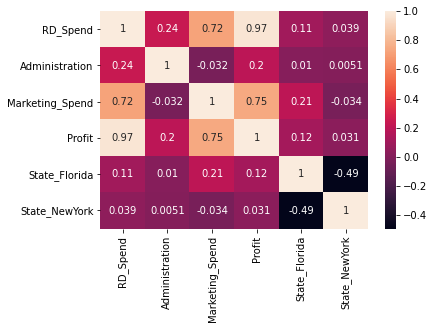

In [ ]:
sns.heatmap(startup.corr(),annot=True)

RD_Spend is highly correlated with Profit

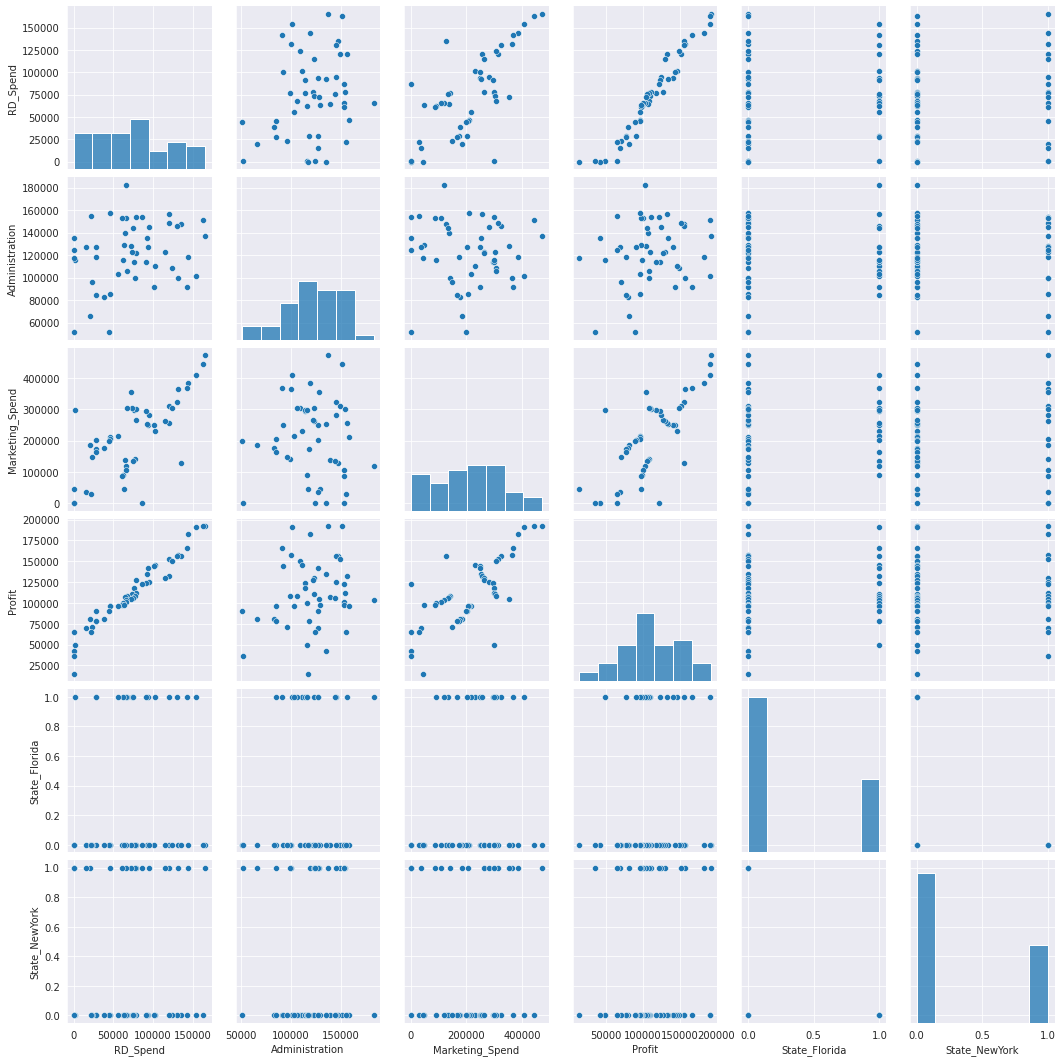

In [ ]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(startup)

In [ ]:
#Build model_1 (All the variables in the dataset are considered)
import statsmodels.formula.api as smf 
model_1 = smf.ols('Profit~RD_Spend+Administration+Marketing_Spend+State_Florida+State_NewYork',data=startup).fit()

In [ ]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sun, 02 May 2021   Prob (F-statistic):           1.34e-27
Time:                        11:53:09   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
RD_Spend            0.8060      0.046     17.369      0.000       0.712       0.900
Administration     -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing_Spend     0.0270      0.017      1.574      0.123      -0.008       0.062
State_Florida     198.7888   3371.007      0.059      0.953   -6595.030    6992.607
State_NewYork     -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Coefficients
model_1.params

Intercept          50125.343832
RD_Spend               0.806023
Administration        -0.027004
Marketing_Spend        0.026980
State_Florida        198.788793
State_NewYork        -41.887019
dtype: float64

In [ ]:
#t and p-Values
print(model_1.tvalues, '\n', model_1.pvalues)

Intercept           7.280560
RD_Spend           17.368580
Administration     -0.517012
Marketing_Spend     1.573889
State_Florida       0.058970
State_NewYork      -0.012864
dtype: float64 
 Intercept          4.444178e-09
RD_Spend           2.578772e-21
Administration     6.077373e-01
Marketing_Spend    1.226769e-01
State_Florida      9.532429e-01
State_NewYork      9.897941e-01
dtype: float64


Administration and Marketing Spend have quite closer p-values and should be evaluated further to consider them for our model.

In [ ]:
#R-squared values
model1_rsq=np.round(model_1.rsquared,4)
print(model1_rsq)
model1_adjR=np.round(model_1.rsquared_adj,4)
print(model1_adjR)

0.9508
0.9452


R-squared value for model 1 is 0.9508 when all the given records and features are considered.
We will further evaluate the model for better results

**Model_2**

In [ ]:
#Build model_2 (State variables are removed)
import statsmodels.formula.api as smf 
model_2 = smf.ols('Profit~RD_Spend+Administration+Marketing_Spend',data=startup).fit()

In [ ]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 02 May 2021   Prob (F-statistic):           4.53e-30
Time:                        12:06:23   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD_Spend            0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model_2.params

Intercept          50122.192990
RD_Spend               0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [ ]:
#t and p-Values
print(model_2.tvalues, '\n', model_2.pvalues)

Intercept           7.626218
RD_Spend           17.846374
Administration     -0.525507
Marketing_Spend     1.655077
dtype: float64 
 Intercept          1.057379e-09
RD_Spend           2.634968e-22
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
dtype: float64


Administration has higher p-value and let us build the next model without this variable

In [ ]:
#R-squared values
model2_rsq=np.round(model_2.rsquared,4)
print(model2_rsq)
model2_adjR=np.round(model_2.rsquared_adj,4)
print(model2_adjR)

0.9507
0.9475


Let us look into how Administration and MarketingSpend individually affects our data

In [ ]:
ml_ad=smf.ols('Profit~Administration',data = startup).fit()  
#t and p-Values
print(ml_ad.tvalues, '\n', ml_ad.pvalues)

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


Administration is not significant

In [ ]:
ml_ms=smf.ols('Profit~Marketing_Spend',data = startup).fit()  
print(ml_ms.tvalues, '\n', ml_ms.pvalues)

Intercept          7.808356
Marketing_Spend    7.802657
dtype: float64 
 Intercept          4.294735e-10
Marketing_Spend    4.381073e-10
dtype: float64


Marketing_Spend has significant impact on Profit of the startup

In [ ]:
ms_ad=smf.ols('Profit~Administration+Marketing_Spend',data = startup).fit()  
print(ms_ad.tvalues, '\n', ms_ad.pvalues)

Intercept          1.142741
Administration     2.467779
Marketing_Spend    8.281039
dtype: float64 
 Intercept          2.589341e-01
Administration     1.729198e-02
Marketing_Spend    9.727245e-11
dtype: float64


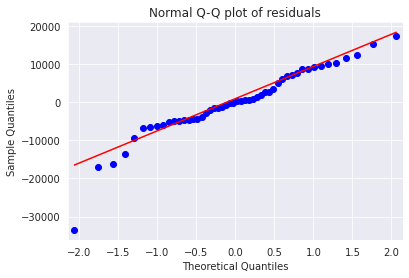

In [ ]:
import statsmodels.api as sm
qqplot=sm.qqplot(model_1.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

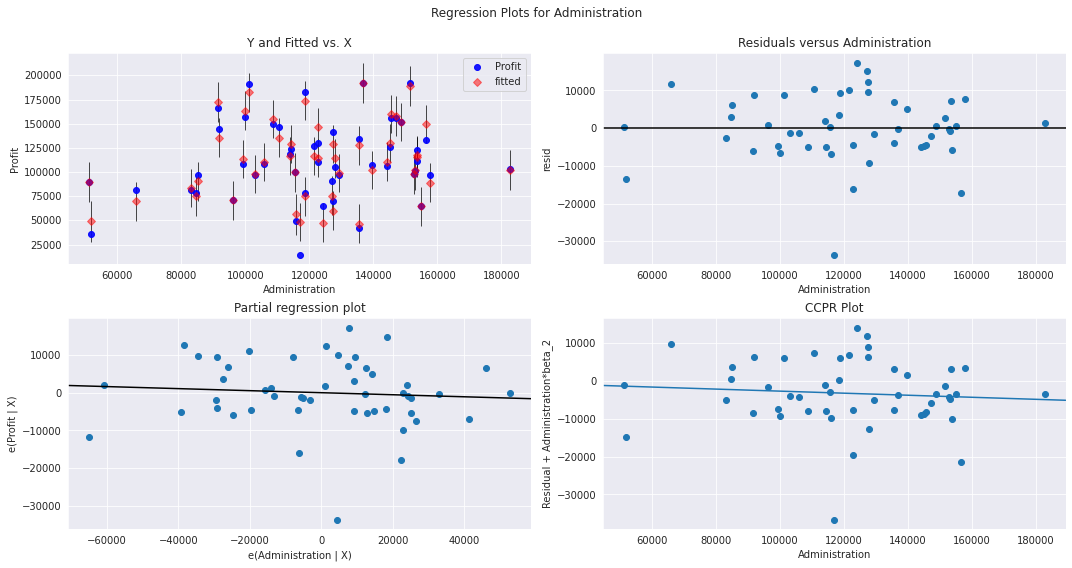

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_1, "Administration", fig=fig)
plt.show()

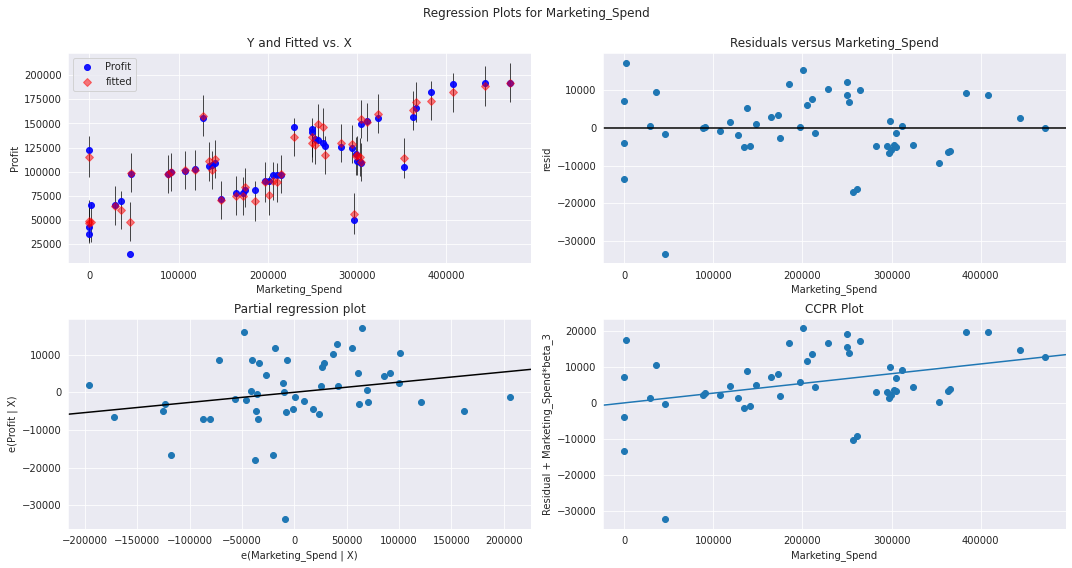

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_1, "Marketing_Spend", fig=fig)
plt.show()

From partial regression plot, we can say that Marketing_Spend has more effect on Profit

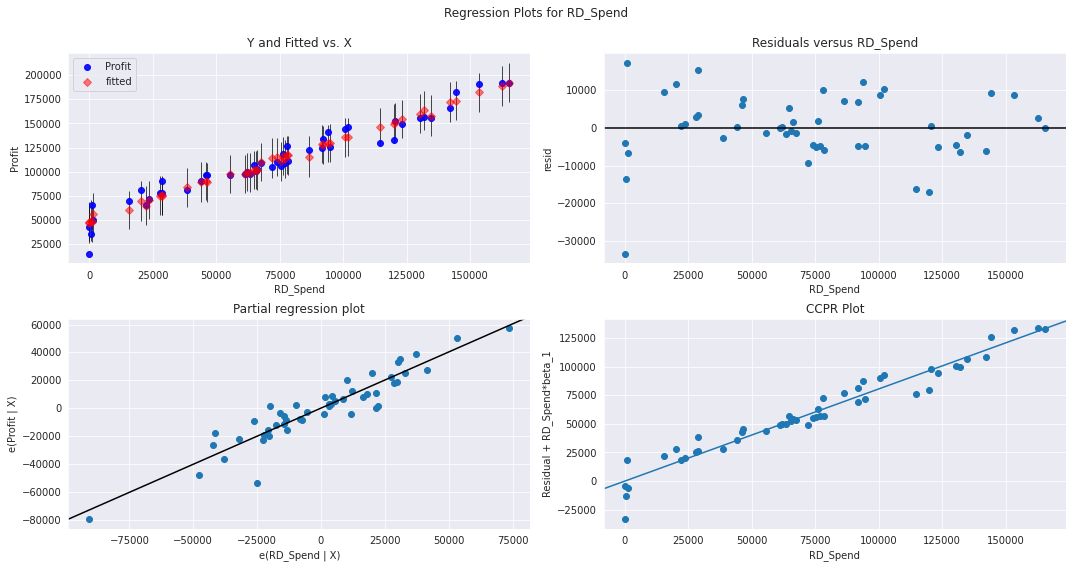

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_1, "RD_Spend", fig=fig)
plt.show()

R & D Spend is perfectly linearly correlated with Profit

In [ ]:
model_influence = model_1.get_influence()
(c, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


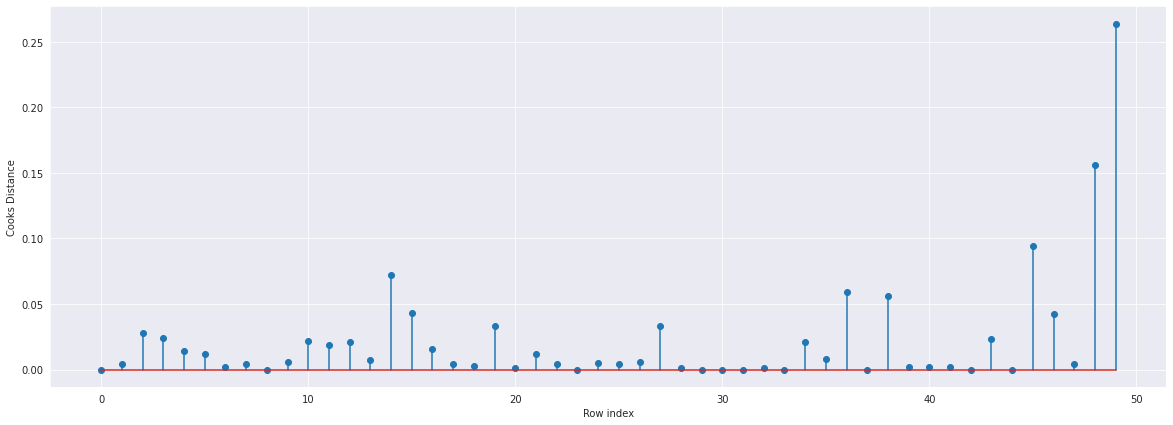

In [ ]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c)) #0.26

(49, 0.26395943587182596)

Since the value is <1, no need to worry about the 50th record

Remove the not very significant Administration variable and check for R-squared values

In [ ]:
model_3 = smf.ols('Profit~RD_Spend+Marketing_Spend',data=startup).fit()

In [ ]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sun, 02 May 2021   Prob (F-statistic):           2.16e-31
Time:                        12:11:17   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RD_Spend            0.7966      0.041     19.266      0.000       0.713       0.880
Marketing_Spend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model3_rsq=np.round(model_3.rsquared,4)
print(model3_rsq)
model3_adjR=np.round(model_3.rsquared_adj,4)
print(model3_adjR)

0.9505
0.9483


In [ ]:
model_3.pvalues

Intercept          3.504062e-22
RD_Spend           6.040433e-24
Marketing_Spend    6.003040e-02
dtype: float64

As we can see, the p value for Marketing Spend has increased and is greater than 0.05.

Therefore, in our next model we shall consider only R&D Spend to predict the Profit and see any significant changes.

Model_4

In [ ]:
model_4 = smf.ols('Profit~RD_Spend',data=startup).fit()

In [ ]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sun, 02 May 2021   Prob (F-statistic):           3.50e-32
Time:                        12:16:48   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RD_Spend       0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model4_rsq=np.round(model_4.rsquared,4)
print(model4_rsq)
model4_adjR=np.round(model_4.rsquared_adj,4)
print(model4_adjR)

0.9465
0.9454


Our R_Squared values has come down. Hence,this model is not accepted i.e., do not consider only R&D Spend to build the model.

In [ ]:
# Storing rsquared values in a data frame
d1 = {'Model':['1','2','3','4'],'r_squared':[model1_rsq,model2_rsq,model3_rsq,model4_rsq],'adjR_sqr':[model1_adjR,model2_adjR,model3_adjR,model4_adjR]}
rsq_df = pd.DataFrame(d1)  
rsq_df

,Model,r_squared,adjR_sqr
0,1,0.9508,0.9452
1,2,0.9507,0.9475
2,3,0.9505,0.9483
3,4,0.9465,0.9454


As we can see from the above table, the R-Squared value is decreasing as we decrease the number of variables. R_squared is a bias parameter. The fourth model is rejected as it has the least R2. Among, the first 3 models, third model would be better as it gives the same information or prediction with just two significant variables (R&D Spend and Marketing Spend)